In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Import dataset
df = pd.read_csv("hotel_bookings.csv")

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# sum of null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df = df.drop(columns = ['company', 'agent', 'country', 'adults', 'children', 'babies'])

df.isnull().sum()
     

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

In [12]:
# Value in arrival_date_month
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [18]:
#Create a distionary to map the months to numerical values
month_map = {
    'January': 1, 
    'February':2, 
    'March': 3, 
    'April': 4, 
    'May': 5, 
    'June': 6,
    'July': 7, 
    'August': 8, 
    'September': 9, 
    'October': 10, 
    'November': 11, 
    'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,BB,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,BB,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,BB,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,BB,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,BB,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str)
                                    )

# Drop the individual date columns 
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   meal                            119390 non-null  object        
 7   market_segment                  119390 non-null  object        
 8   distribution_channel            119390 non-null  object        
 9   is_repeated_guest               119390 non-null  int64         
 10  previous_cancellations          119390 non-null  int64  

In [24]:
#convert reservation_status_date to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_week_number                   int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
meal                                      object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
days_in_waiting_list                       int64
customer_type                             object
adr                                      float64
required_car_parking_spaces                int64
total_of_special_req

In [26]:
# Rename columns for better understanding

# Use a dictionary that maps current column name to provided name

columns_rename = {
    'hotel': 'Hotel Type',
    'is_canceled': 'Reservation Canceled',
    'lead_time': 'Lead Time',
    'arrival_date_week_number': 'Arrival Week',
    'stays_in_weekend_nights': 'Weekend Nights',
    'stays_in_week_nights': 'Week Nights',
    'meal': 'Meal Type',
    'market_segment': 'Market Segment',
    'distribution_channel': 'Distribution Channel',
    'is_repeated_guest': 'Repeated Guest',
    'previous_cancellations': 'Previous Cancellations',
    'previous_bookings_not_canceled': 'Previous Bookings (Not Canceled)',
    'reserved_room_type': 'Reserved Room Type',
    'assigned_room_type': 'Assigned Room Type',
    'booking_changes': 'Booking Changes',
    'deposit_type': 'Deposit Type',
    'days_in_waiting_list': 'Days in Waiting List',
    'customer_type': 'Customer Type',
    'adr': 'Average Daily Rate',
    'required_car_parking_spaces': 'Parking Spaces Required',
    'total_of_special_requests': 'Special Requests Total',
    'reservation_status': 'Reservation Status',
    'reservation_status_date': 'Reservation Status Date',
    'arrival_date': 'Arrival Date'

}

# Apply the mapping to rename the columns
df.rename(columns = columns_rename, inplace=True)

df.head()

,Hotel Type,Reservation Canceled,Lead Time,Arrival Week,Weekend Nights,Week Nights,Meal Type,Market Segment,Distribution Channel,Repeated Guest,...,Booking Changes,Deposit Type,Days in Waiting List,Customer Type,Average Daily Rate,Parking Spaces Required,Special Requests Total,Reservation Status,Reservation Status Date,Arrival Date
0,Resort Hotel,0,342,27,0,0,BB,Direct,Direct,0,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,BB,Direct,Direct,0,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,BB,Direct,Direct,0,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,BB,Corporate,Corporate,0,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,BB,Online TA,TA/TO,0,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [28]:
# Checking for duplicates
df.duplicated(keep=False).sum()

43117

In [30]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated(keep=False).sum()

0

In [34]:
# Select categorical columns
cat_columns = df.select_dtypes(include=['object'])

# Calculate the frequency of categorical values in each selected column
frequency_counts = {}

for column in cat_columns:
    frequency_counts[column] = df[column].value_counts()

# Print the frequency counts for each categorical column
for column, counts in frequency_counts.items():
    print(f"Frequency counts for {column}:")
    print(counts)
    print()  


Frequency counts for Hotel Type:
Hotel Type
City Hotel      51748
Resort Hotel    33477
Name: count, dtype: int64

Frequency counts for Meal Type:
Meal Type
BB           66227
SC            9305
HB            8867
Undefined      469
FB             357
Name: count, dtype: int64

Frequency counts for Market Segment:
Market Segment
Online TA        50884
Offline TA/TO    13331
Direct           11649
Groups            4392
Corporate         4064
Complementary      697
Aviation           206
Undefined            2
Name: count, dtype: int64

Frequency counts for Distribution Channel:
Distribution Channel
TA/TO        67474
Direct       12777
Corporate     4794
GDS            175
Undefined        5
Name: count, dtype: int64

Frequency counts for Reserved Room Type:
Reserved Room Type
A    54759
D    17150
E     5980
F     2806
G     2046
B      965
C      912
H      595
L        6
P        6
Name: count, dtype: int64

Frequency counts for Assigned Room Type:
Assigned Room Type
A    44828
D   

In [40]:
#resampling to balance the number of records for two categories of Hotel Type: "City Hotel" and "Resort Hotel."#

In [42]:
city_hotel_df = df[df['Hotel Type'] == 'City Hotel']
resort_hotel_df = df[df['Hotel Type'] == 'Resort Hotel']

# Sample equal occurrences for each hotel type
num_samples = min(len(city_hotel_df), len(resort_hotel_df))

balanced_city_hotel_df = city_hotel_df.sample(n=num_samples, random_state=42)
balanced_resort_hotel_df = resort_hotel_df.sample(n=num_samples, random_state=42)

# Concatenate the balanced dataframes
data = pd.concat([balanced_city_hotel_df, balanced_resort_hotel_df])

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66954 entries, 99009 to 20280
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Hotel Type                        66954 non-null  object        
 1   Reservation Canceled              66954 non-null  int64         
 2   Lead Time                         66954 non-null  int64         
 3   Arrival Week                      66954 non-null  int64         
 4   Weekend Nights                    66954 non-null  int64         
 5   Week Nights                       66954 non-null  int64         
 6   Meal Type                         66954 non-null  object        
 7   Market Segment                    66954 non-null  object        
 8   Distribution Channel              66954 non-null  object        
 9   Repeated Guest                    66954 non-null  int64         
 10  Previous Cancellations            66954 non-nul

In [44]:
# Select categorical columns excluding 'CustomerID'
cat_columns = data.select_dtypes(include=['object'])


# Calculate the frequency of categorical values in each selected column
frequency_counts = {}

for column in cat_columns:
    frequency_counts[column] = data[column].value_counts()

# Print the frequency counts for each categorical column
for column, counts in frequency_counts.items():
    print(f"Frequency counts for {column}:")
    print(counts)
    print() 

Frequency counts for Hotel Type:
Hotel Type
City Hotel      33477
Resort Hotel    33477
Name: count, dtype: int64

Frequency counts for Meal Type:
Meal Type
BB           52168
HB            7899
SC            6067
Undefined      469
FB             351
Name: count, dtype: int64

Frequency counts for Market Segment:
Market Segment
Online TA        38858
Offline TA/TO    10884
Direct            9704
Groups            3574
Corporate         3279
Complementary      510
Aviation           144
Undefined            1
Name: count, dtype: int64

Frequency counts for Distribution Channel:
Distribution Channel
TA/TO        52283
Direct       10642
Corporate     3911
GDS            115
Undefined        3
Name: count, dtype: int64

Frequency counts for Reserved Room Type:
Reserved Room Type
A    41937
D    13365
E     5455
F     2193
G     1877
C      906
B      615
H      595
L        6
P        5
Name: count, dtype: int64

Frequency counts for Assigned Room Type:
Assigned Room Type
A    33561
D   

In [46]:
# Convert categorical columns to 'category' data type for efficiency
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert to categorical
df[categorical_cols] = df[categorical_cols].astype('category')

# Check the data types after conversion
print(df.dtypes)


Hotel Type                                category
Reservation Canceled                         int64
Lead Time                                    int64
Arrival Week                                 int64
Weekend Nights                               int64
Week Nights                                  int64
Meal Type                                 category
Market Segment                            category
Distribution Channel                      category
Repeated Guest                               int64
Previous Cancellations                       int64
Previous Bookings (Not Canceled)             int64
Reserved Room Type                        category
Assigned Room Type                        category
Booking Changes                              int64
Deposit Type                              category
Days in Waiting List                         int64
Customer Type                             category
Average Daily Rate                         float64
Parking Spaces Required        

# Exploratory Data Analysis

## Customer Types by Hotel Type

In [58]:
# Group by customer type and hotel type, then count the occurrences
customer_hotel_count = df.groupby(['Customer Type', 'Hotel Type'], observed=False).size().reset_index(name='count')

customer_hotel_count

,Customer Type,Hotel Type,count
0,Contract,City Hotel,1437
1,Contract,Resort Hotel,1657
2,Group,City Hotel,269
3,Group,Resort Hotel,273
4,Transient,City Hotel,43932
5,Transient,Resort Hotel,27139
6,Transient-Party,City Hotel,6110
7,Transient-Party,Resort Hotel,4408


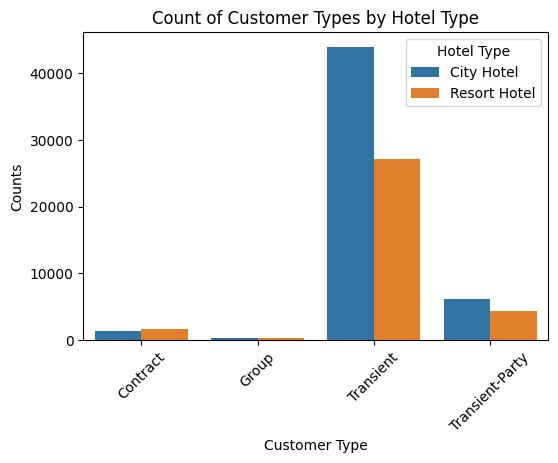

In [85]:
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=customer_hotel_count, x='Customer Type', y='count', hue='Hotel Type')
plt.title('Count of Customer Types by Hotel Type')
plt.xlabel('Customer Type')
plt.ylabel('Counts')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45)
plt.show()



In [66]:
# Group by hotel type and sum the weekend and week nights
stay_hotel_counts = df.groupby('Hotel Type', observed=False)[['Weekend Nights', 'Week Nights']].sum().reset_index()

# Print the counts
print(stay_hotel_counts)

     Hotel Type  Weekend Nights  Week Nights
0    City Hotel           45287       118127
1  Resort Hotel           40812       106608


<Figure size 600x400 with 0 Axes>

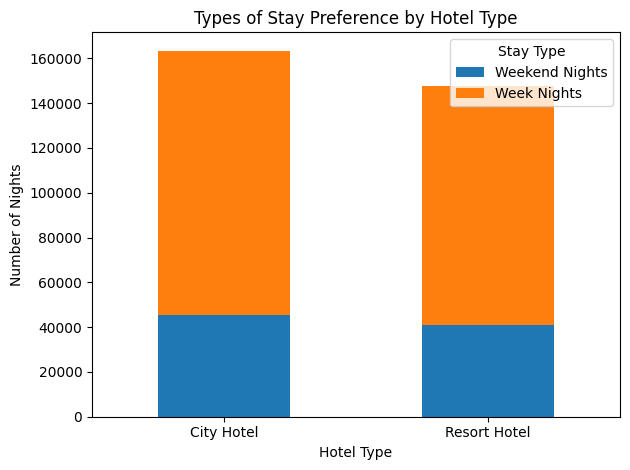

In [91]:
plt.figure(figsize=(6, 4))
stay_hotel_counts.set_index('Hotel Type').plot(kind='bar', stacked=True)
plt.title('Types of Stay Preference by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Nights')
plt.xticks(rotation=0)
plt.legend(title='Stay Type', labels=['Weekend Nights', 'Week Nights'])
plt.tight_layout()
plt.show()

## Lead Time Analysis

In [93]:
# Group by hotel type and calculate the average lead time
lead_time_analysis = df.groupby('Hotel Type', observed=False)['Lead Time'].mean().reset_index()

# Print the average lead time
print(lead_time_analysis)

     Hotel Type  Lead Time
0    City Hotel  77.029934
1  Resort Hotel  83.104997


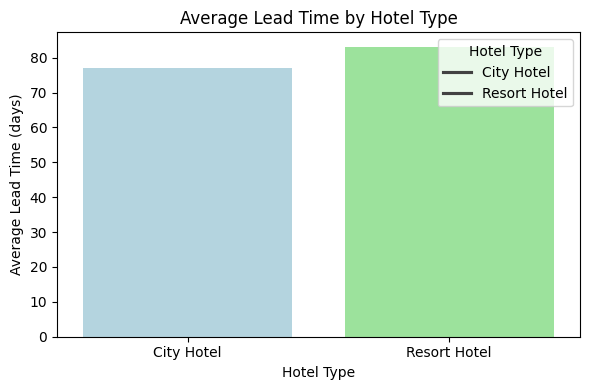

In [119]:
plt.figure(figsize=(6, 4))
sns.barplot(data=lead_time_analysis, x='Hotel Type', y='Lead Time', hue='Hotel Type', palette=['lightblue', 'lightgreen'])
plt.title('Average Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=0)
plt.legend(title='Hotel Type', labels=['City Hotel', 'Resort Hotel'])  # This will automatically generate the legend based on hue
plt.tight_layout()
plt.show()
     

In [ ]:
# A t-test to determine significance of booking lead times

In [122]:
from scipy import stats

# Split the data into two groups: lead times for city hotels and resort hotels
city_hotel_lead_time = df[df['Hotel Type'] == 'City Hotel']['Lead Time']
resort_hotel_lead_time = df[df['Hotel Type'] == 'Resort Hotel']['Lead Time']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(city_hotel_lead_time, resort_hotel_lead_time, equal_var=False)

# Print the t-statistic and p-value
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("The difference in lead times between city hotels and resort hotels is statistically significant.")
else:
    print("The difference in lead times between city hotels and resort hotels is not statistically significant.")


T-statistic: -9.881486468555135
P-value: 5.1981053681997675e-23
The difference in lead times between city hotels and resort hotels is statistically significant.


## Customers with highest lead times for hotel types

In [128]:
# Group by customer type and hotel type, and calculate the average lead time
customer_lead_time = df.groupby(['Customer Type', 'Hotel Type'], observed=False)['Lead Time'].mean().reset_index()

#sort the dataframe by lead times in descending order to find customers with highest lead time
customer_lead_time_desc = customer_lead_time.sort_values(by = 'Lead Time', ascending=False)

#print the sorted results
print(customer_lead_time_desc)

     Customer Type    Hotel Type   Lead Time
1         Contract  Resort Hotel  163.817743
7  Transient-Party  Resort Hotel  115.796053
6  Transient-Party    City Hotel  109.948936
4        Transient    City Hotel   73.604115
5        Transient  Resort Hotel   73.152401
3            Group  Resort Hotel   54.754579
2            Group    City Hotel   48.628253
0         Contract    City Hotel   47.112039


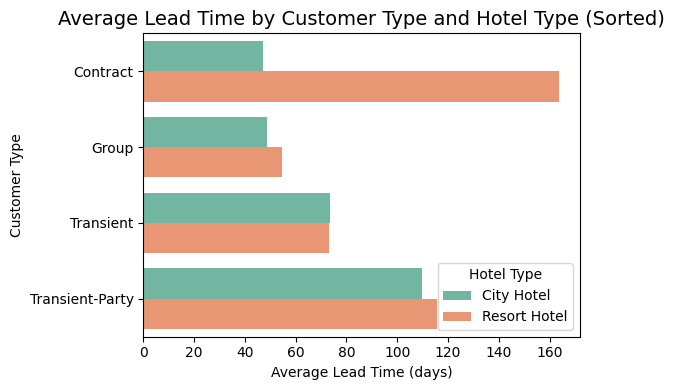

In [132]:
# Plot horizontal bar graph of sorted lead times
plt.figure(figsize=(6, 4))
sns.barplot(data=customer_lead_time_desc, x='Lead Time', y='Customer Type', hue='Hotel Type', palette='Set2')

# Add titles and labels
plt.title('Average Lead Time by Customer Type and Hotel Type (Sorted)', fontsize=14)
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Customer Type')

# Display the plot
plt.tight_layout()
plt.show()


## Reservation Status Distribution

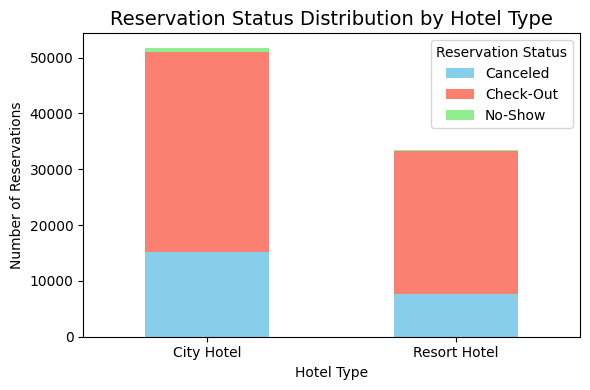

In [140]:
# Group the data by Hotel Type and Reservation Status, and count the occurrences
reservation_status_counts = df.groupby(['Hotel Type', 'Reservation Status'], observed=False).size().reset_index(name='count')

# Pivot the data to get Reservation Status as columns
pivot_table = reservation_status_counts.pivot(index='Hotel Type', columns='Reservation Status', values='count').fillna(0)

# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(6, 4), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Reservation Status Distribution by Hotel Type', fontsize=14)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


## Comparing customer types and reservation status for different hotel types

In [146]:
# Group by customer type, hotel type, and reservation status, then count occurrences
reservation_analysis = df.groupby(['Customer Type', 'Hotel Type', 'Reservation Status'], observed=False).size().reset_index(name='count')

# Print the grouped data
print(reservation_analysis)


      Customer Type    Hotel Type Reservation Status  count
0          Contract    City Hotel           Canceled    349
1          Contract    City Hotel          Check-Out   1069
2          Contract    City Hotel            No-Show     19
3          Contract  Resort Hotel           Canceled    137
4          Contract  Resort Hotel          Check-Out   1514
5          Contract  Resort Hotel            No-Show      6
6             Group    City Hotel           Canceled     22
7             Group    City Hotel          Check-Out    245
8             Group    City Hotel            No-Show      2
9             Group  Resort Hotel           Canceled     28
10            Group  Resort Hotel          Check-Out    243
11            Group  Resort Hotel            No-Show      2
12        Transient    City Hotel           Canceled  13741
13        Transient    City Hotel          Check-Out  29562
14        Transient    City Hotel            No-Show    629
15        Transient  Resort Hotel       

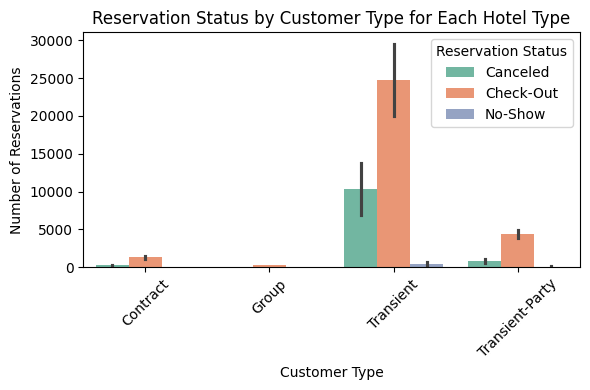

In [148]:
# Create a bar plot to compare reservation statuses
plt.figure(figsize=(6, 4))
sns.barplot(data=reservation_analysis, x='Customer Type', y='count', hue='Reservation Status', palette='Set2')
plt.title('Reservation Status by Customer Type for Each Hotel Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.legend(title='Reservation Status')
plt.tight_layout()
plt.show()

## Relationship between deposit and reservation status 

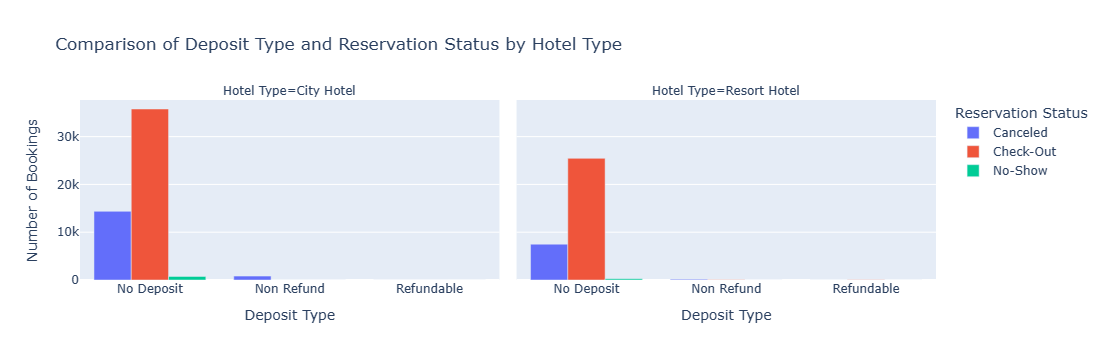

In [165]:
# Group data by Deposit Type, Reservation Status, and Hotel Type, then count occurrences
deposit_reservation_status = df.groupby(['Deposit Type', 'Reservation Status', 'Hotel Type'], observed=False).size().reset_index(name='Count')

# Create a bar chart to compare Deposit Type and Reservation Status for each hotel type
fig = px.bar(deposit_reservation_status, x='Deposit Type', y='Count',
                                  color='Reservation Status', facet_col='Hotel Type',
                                  labels={'Deposit Type': 'Deposit Type', 'Count': 'Number of Bookings'},
                                  title='Comparison of Deposit Type and Reservation Status by Hotel Type',
                                  barmode='group')

# Show the plot
fig.show()

In [184]:
# Group by Hotel Type and Room Type, and count the number of reservations
room_type_distribution = df.groupby(['Hotel Type', 'Reserved Room Type'], observed=False).size().unstack(fill_value=0)
room_type_distribution = room_type_distribution.reset_index()

room_type_distribution

Reserved Room Type,Hotel Type,A,B,C,D,E,F,G,H,L,P
0,City Hotel,36479,962,14,10607,1455,1750,477,0,0,4
1,Resort Hotel,18280,3,898,6543,4525,1056,1569,595,6,2


In [186]:
assigned_room_type = df.groupby(['Hotel Type', 'Assigned Room Type'], observed=False).size().unstack(fill_value=0)
assigned_room_type =assigned_room_type.reset_index()
assigned_room_type

Assigned Room Type,Hotel Type,A,B,C,D,E,F,G,H,I,K,L,P
0,City Hotel,32158,1584,161,12893,2028,1961,688,0,0,271,0,4
1,Resort Hotel,12670,159,1984,9090,5072,1640,1801,705,353,0,1,2


## Average Days in waiting list

In [197]:
# Group by Hotel Type and calculate average days in waiting list
waiting_list_analysis = df.groupby('Hotel Type', observed=False)['Days in Waiting List'].mean().reset_index()

waiting_list_analysis

,Hotel Type,Days in Waiting List
0,City Hotel,0.923630
1,Resort Hotel,0.320429


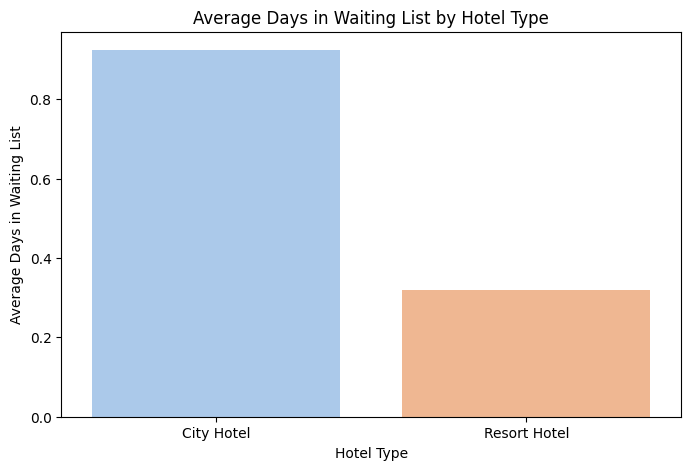

In [199]:
# Visualize the average days in the waiting list by hotel type
plt.figure(figsize=(8, 5))
sns.barplot(data=waiting_list_analysis, x='Hotel Type', y='Days in Waiting List', hue='Hotel Type', palette='pastel', legend=False)
plt.title('Average Days in Waiting List by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Days in Waiting List')
plt.xticks(rotation=0)
plt.show()

## Average Daily Rates

In [204]:
average_daily_rate = df.groupby('Hotel Type', observed=False)['Average Daily Rate'].mean().reset_index(name='Average Daily Rate')
average_daily_rate
     

,Hotel Type,Average Daily Rate
0,City Hotel,111.293148
1,Resort Hotel,99.445644


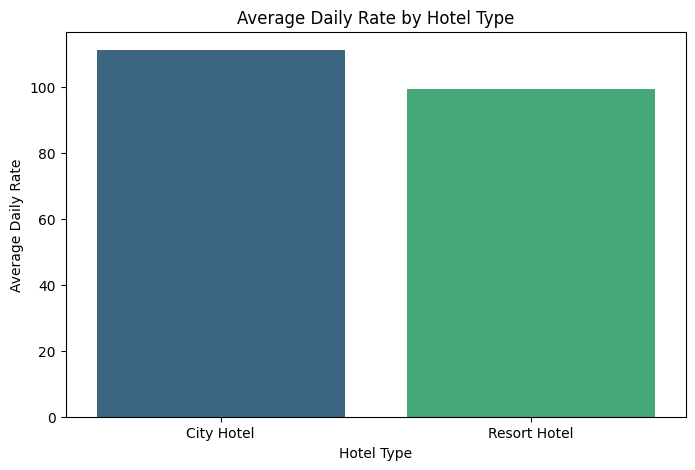

In [210]:
plt.figure(figsize=(8, 5))
sns.barplot(data=average_daily_rate, x='Hotel Type', y='Average Daily Rate', hue= 'Hotel Type', palette='viridis', legend=False)
plt.title('Average Daily Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=0)
plt.show()

In [216]:
# Separate ADR data for each hotel type
adr_city_hotel = df[df['Hotel Type'] == 'City Hotel']['Average Daily Rate']
adr_resort_hotel = df[df['Hotel Type'] == 'Resort Hotel']['Average Daily Rate']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(adr_city_hotel, adr_resort_hotel)

# Print results
print('T-Test Results')
print('T-statistic:', t_statistic)
print('p-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference in ADR between City Hotel and Resort Hotel")
else:
    print("There is no significant difference in ADR between City Hotel and Resort Hotel")

T-Test Results
T-statistic: 30.68052666414951
p-value: 1.3740782280549428e-205
There is a significant difference in ADR between City Hotel and Resort Hotel


## Customer type vs ADR for each hotel type

In [221]:
# Group by Hotel Type and Customer Type, and calculate the average daily rate
adr_customer_type = df.groupby(['Hotel Type', 'Customer Type'], observed=False)['Average Daily Rate'].mean().reset_index()

# Sort the dataframe by hotel type and ADR for better readability
adr_customer_type = adr_customer_type.sort_values(by=['Hotel Type', 'Average Daily Rate'], ascending=[True, False])

adr_customer_type

,Hotel Type,Customer Type,Average Daily Rate
2,City Hotel,Transient,114.138145
0,City Hotel,Contract,107.681580
1,City Hotel,Group,93.483048
3,City Hotel,Transient-Party,92.470614
6,Resort Hotel,Transient,104.015893
7,Resort Hotel,Transient-Party,80.235572
4,Resort Hotel,Contract,79.646639
5,Resort Hotel,Group,75.463773


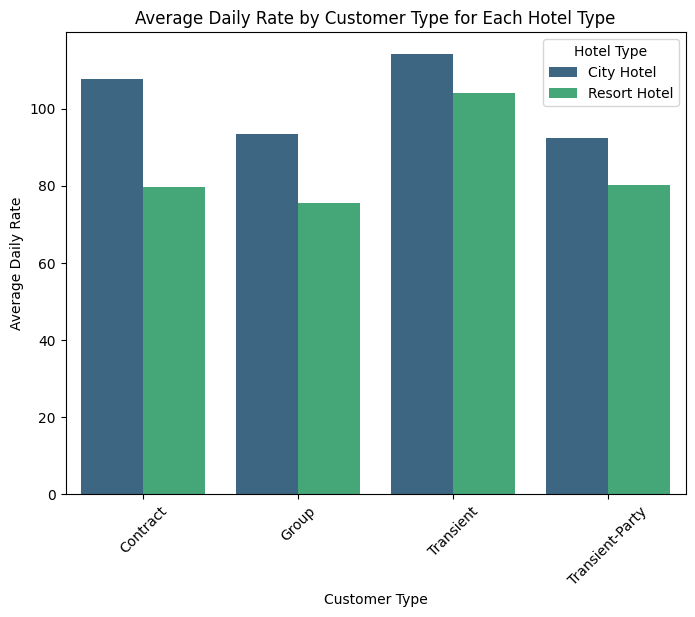

In [225]:
plt.figure(figsize=(8, 6))
sns.barplot(data=adr_customer_type, x='Customer Type', y='Average Daily Rate', hue='Hotel Type', palette='viridis')
plt.title('Average Daily Rate by Customer Type for Each Hotel Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45)
plt.show()

## ADR and Meal types

In [238]:
# Group by Meal Type and calculate the average ADR
adr_meal_type = df.groupby(['Meal Type', 'Hotel Type'], observed=False)['Average Daily Rate'].mean().reset_index()

# Print the result
print(adr_meal_type)


   Meal Type    Hotel Type  Average Daily Rate
0         BB    City Hotel          112.326932
1         BB  Resort Hotel           91.301610
2         FB    City Hotel           53.590909
3         FB  Resort Hotel          146.281272
4         HB    City Hotel          138.508750
5         HB  Resort Hotel          132.175358
6         SC    City Hotel           99.028512
7         SC  Resort Hotel            5.321310
8  Undefined    City Hotel                 NaN
9  Undefined  Resort Hotel          106.948145


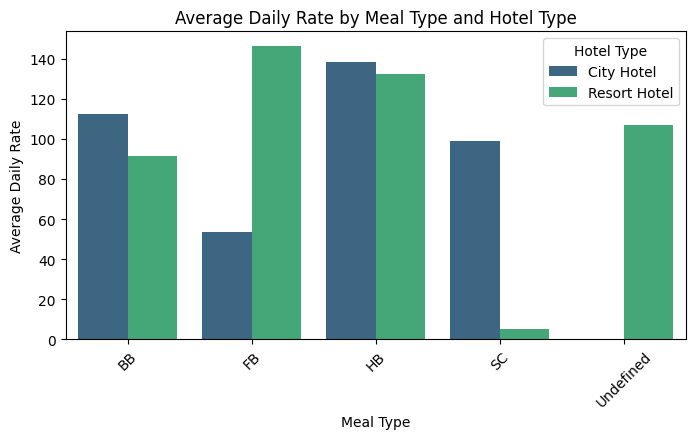

In [246]:
plt.figure(figsize=(8, 4))
sns.barplot(data=adr_meal_type, x='Meal Type', y='Average Daily Rate', hue='Hotel Type', palette='viridis')
plt.title('Average Daily Rate by Meal Type and Hotel Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.show()

## ADR when parking is required

In [253]:
# Filter the DataFrame to include only rows where parking space is required
parking_required_df = df[df['Parking Spaces Required'] > 0]

# Calculate the average daily rate for each hotel type when parking space is required
avg_adr_parking_required = parking_required_df.groupby('Hotel Type', observed=False)['Average Daily Rate'].mean().reset_index(name='Average Daily Rate')

# Display the average daily rate for different hotel types when parking space is required
avg_adr_parking_required
     

,Hotel Type,Average Daily Rate
0,City Hotel,122.227123
1,Resort Hotel,110.729850


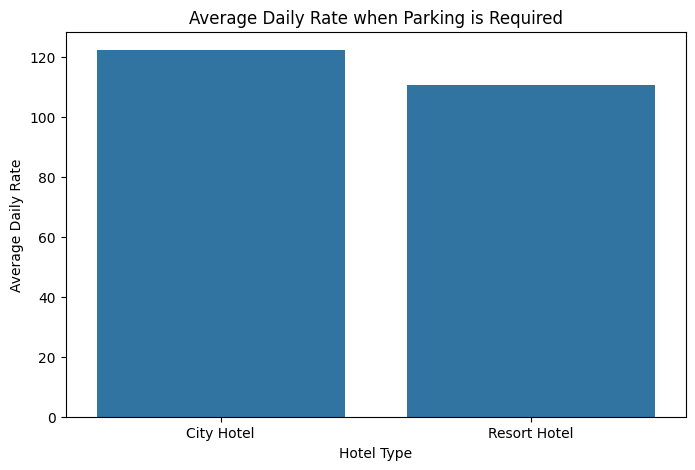

In [255]:
plt.figure(figsize=(8, 5))
sns.barplot(data=adr_parking, x='Hotel Type', y='Average Daily Rate')
plt.title('Average Daily Rate when Parking is Required')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate')
plt.show()

In [259]:
# Filter the DataFrame to include only rows where parking space is required
parking_df = df[df['Parking Spaces Required'] > 0]

# Separate ADR data for each hotel type
adr_city_hotel = parking_df[parking_df['Hotel Type'] == 'City Hotel']['Average Daily Rate']
adr_resort_hotel = parking_df[parking_df['Hotel Type'] == 'Resort Hotel']['Average Daily Rate']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(adr_city_hotel, adr_resort_hotel)

# Print results
print('T-Test Results')
print('T-statistic:', t_statistic)
print('p-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference in ADR between City Hotel and Resort Hotel when parking is required")
else:
    print("There is no significant difference in ADR between City Hotel and Resort Hotel when parking is required")
     

T-Test Results
T-statistic: 6.959018903638948
p-value: 3.724445154440299e-12
There is a significant difference in ADR between City Hotel and Resort Hotel when parking is required


# Time Series Analysis

## Arrival Day

In [265]:
# Extract the arrival day from the Arrival Date
df['Arrival Day'] = df['Arrival Date'].dt.day

# Group by arrival day and hotel type, and count the number of arrivals
arrival_day_distribution = df.groupby(['Arrival Day', 'Hotel Type'], observed=False).size().unstack(fill_value=0).reset_index()

arrival_day_distribution.head()

Hotel Type,Arrival Day,City Hotel,Resort Hotel
0,1,1569,1162
1,2,1825,1111
2,3,1729,1050
3,4,1655,1086
4,5,1782,1128


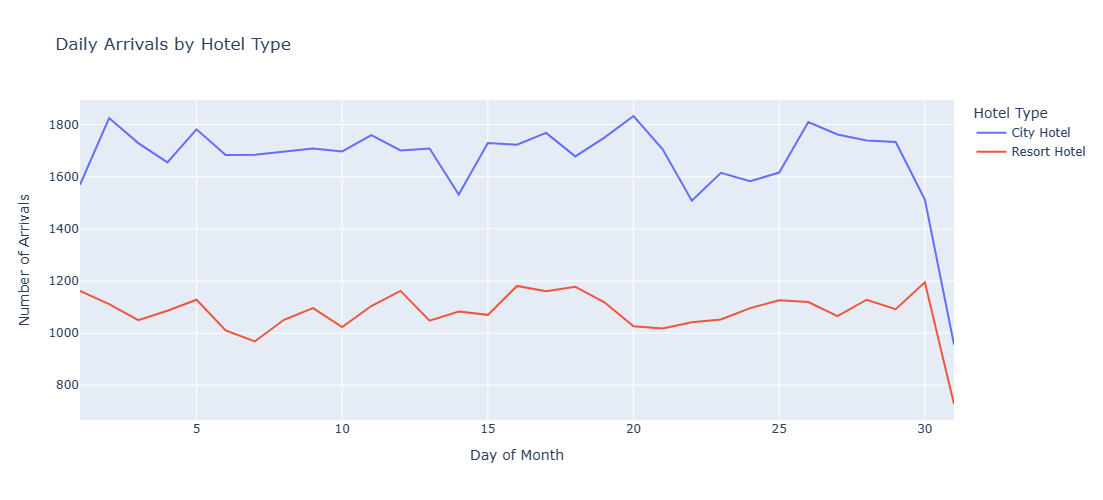

In [286]:
# Create the line graph using Plotly Express
fig = px.line(arrival_day_distribution.reset_index(), x='Arrival Day', y=['City Hotel', 'Resort Hotel'],
              labels={'Arrival Day': 'Day of Month', 'value': 'Number of Arrivals', 'variable': 'Hotel Type'},
              title='Daily Arrivals by Hotel Type',
              width=800, height=500)

# Show the plot
fig.show()

## Arrival by Week number

In [313]:
weekly_arrivals = df.groupby(['Arrival Week', 'Hotel Type'], observed=False).size().unstack(fill_value=0)

weekly_arrivals.head()

Hotel Type,City Hotel,Resort Hotel
Arrival Week,,
1,549,299
2,527,406
3,566,448
4,611,468
5,620,457


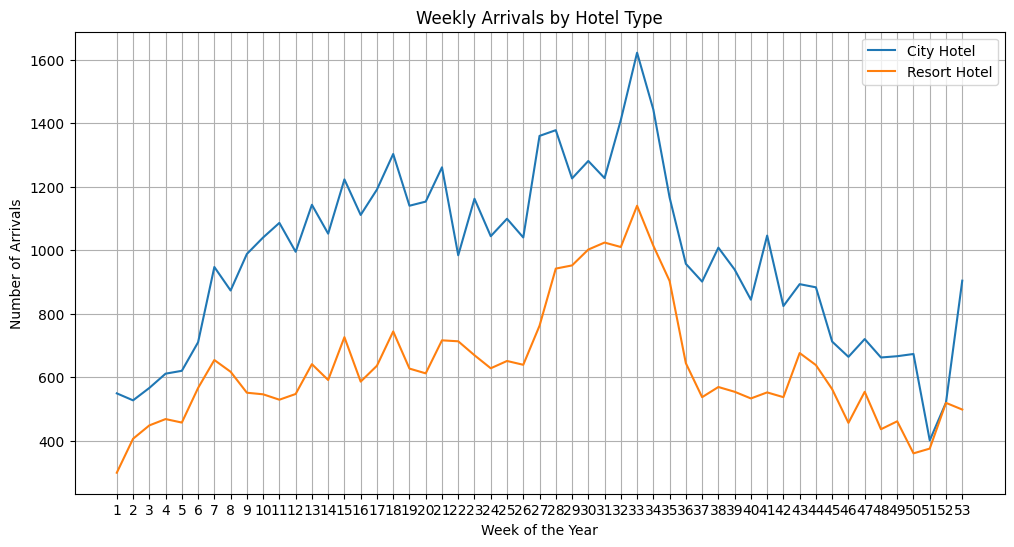

In [296]:
# Plot line graph for weekly arrivals
plt.figure(figsize=(12, 6))
plt.plot(weekly_arrivals.index, weekly_arrivals['City Hotel'], label='City Hotel')
plt.plot(weekly_arrivals.index, weekly_arrivals['Resort Hotel'], label='Resort Hotel')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Arrivals')
plt.title('Weekly Arrivals by Hotel Type')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 54))  # Set x-axis ticks for weeks 1 to 53
plt.show()

## Arrival during month

In [309]:
# Extract the month information from the "Arrival Date" column
df['Arrival Month'] = df['Arrival Date'].dt.month

# Group the data by 'Arrival Month' and 'Hotel Type', then count the number of arrivals for each month and hotel type.
monthly_arrivals = df.groupby(['Arrival Month', 'Hotel Type'], observed=False).size().unstack(fill_value=0)

monthly_arrivals

Hotel Type,City Hotel,Resort Hotel
Arrival Month,,
1,2644,1923
2,3527,2447
3,4752,2571
4,4945,2781
5,5190,2903
6,4814,2737
7,5619,4278
8,6471,4645
9,4009,2423


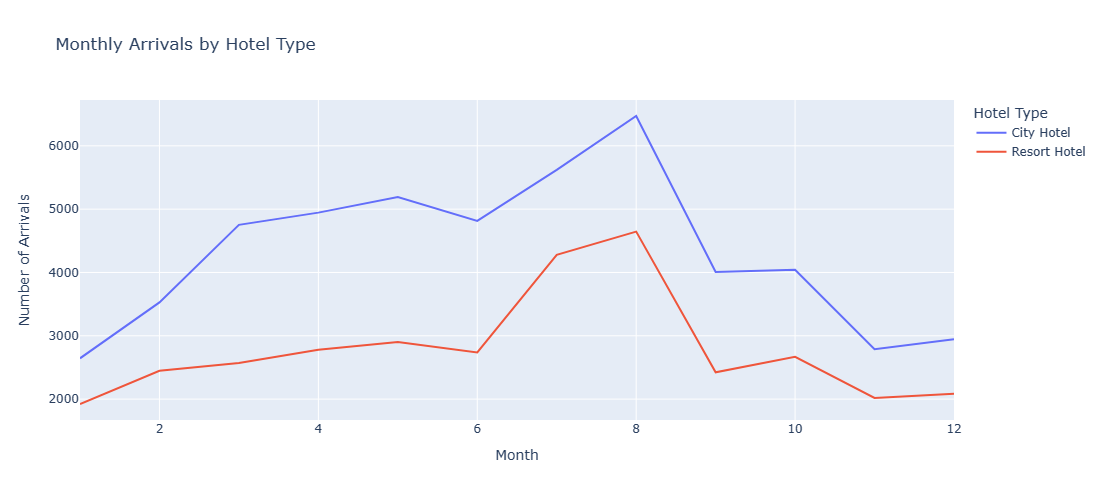

In [307]:
# Plot line graph for monthly arrivals using Plotly Express
fig = px.line(monthly_arrivals.reset_index(), x='Arrival Month', y=['City Hotel', 'Resort Hotel'],
              labels={'Arrival Month': 'Month', 'value': 'Number of Arrivals', 'variable': 'Hotel Type'},
              title='Monthly Arrivals by Hotel Type',
              width=800, height=500)

# Show the plot
fig.show()

## ADR Behavior Throughout the Year by Hotel Type

<Figure size 1200x600 with 0 Axes>

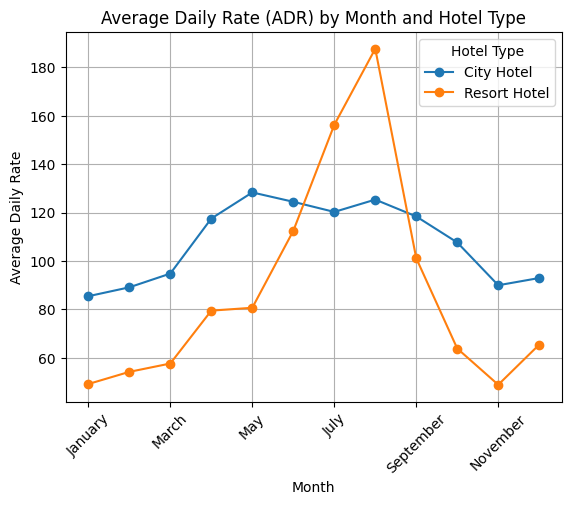

In [322]:
# Group by month and hotel type, and calculate the average ADR
adr_month_distribution = df.groupby(['Month', 'Hotel Type'], observed=False)['Average Daily Rate'].mean().unstack().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Visualize the ADR by month and hotel type
plt.figure(figsize=(12, 6))
adr_month_distribution.plot(marker='o')
plt.title('Average Daily Rate (ADR) by Month and Hotel Type')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Hotel Type')
plt.show()